In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [5]:
uploaded= files.upload()

Saving youtube_video.csv to youtube_video.csv


In [7]:
video = pd.read_csv('youtube_video.csv', encoding= 'unicode_escape')

In [8]:
total_video=video[:1]

In [9]:
video.drop(video.index[:1],inplace=True)

In [ ]:
video.shape

(221, 19)

In [10]:
video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 1 to 223
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Video                               223 non-null    object 
 1   Video title                         223 non-null    object 
 2   Video pub­lish time                 223 non-null    object 
 3   Comments added                      223 non-null    int64  
 4   Shares                              223 non-null    int64  
 5   Dis­likes                           223 non-null    int64  
 6   Likes                               223 non-null    int64  
 7   Sub­scribers lost                   223 non-null    int64  
 8   Subscribers gained                  223 non-null    int64  
 9   RPM (USD)                           223 non-null    float64
 10  CPM (USD)                           221 non-null    float64
 11  Average percentage viewed (%)       223 non-n

In [11]:
video.isnull().sum()

,0
Video,0
Video title,0
Video pub­lish time,0
Comments added,0
Shares,0
Dis­likes,0
Likes,0
Sub­scribers lost,0
Subscribers gained,0
RPM (USD),0


In [12]:
video[video['CPM (USD)'].isnull()]

,Video,Video title,Video pub­lish time,Comments added,Shares,Dis­likes,Likes,Sub­scribers lost,Subscribers gained,RPM (USD),CPM (USD),Average percentage viewed (%),Average view duration,Views,Watch time (hours),Subscribers,Your estimated revenue (USD),Impressions,Impressions click-through rate (%)
70,UcilY6HDuL8,10000 Subscriber and 100th Video Special (Data...,"May 13, 2020",58,12,4,149,2,53,0.00,NaN,24.01,00:00:41,3064,35.0743,51,0.000,400077,0.49
223,5p73cIRYCZg,ProjectDemoCSC478_UFCFightData,"Jun 6, 2017",0,2,0,1,0,0,0.05,NaN,8.79,00:01:04,60,1.0684,0,0.003,365,11.51


In [13]:
video['CPM (USD)']=video['CPM (USD)'].fillna(0)

In [14]:
video['Video pub­lish time'] = pd.to_datetime(video['Video pub­lish time'], format="%b %d, %Y", errors='coerce')
video['Video pub­lish time']

,Video pub­lish time
1,2020-05-08
2,2020-11-12
3,2020-07-16
4,2020-08-29
5,2020-08-05
...,...
219,2018-11-30
220,2019-05-25
221,2018-12-18
222,2019-05-05


In [15]:
video['Year'] = video['Video pub­lish time'].dt.year
video['Month'] = video['Video pub­lish time'].dt.month

In [16]:
video['Year'].value_counts().sort_index()

,count
Year,
2017,2
2018,7
2019,50
2020,113
2021,47
2022,4


<ipython-input-19-4adcb28de82d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, palette="deep")


Text(0.5, 1.0, 'Number Of Published Videos By Year')

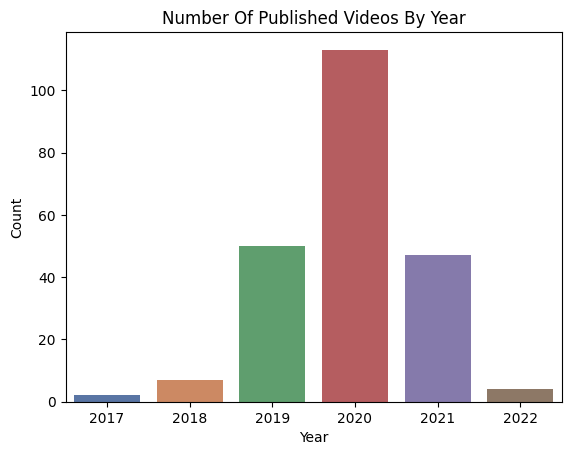

In [19]:
count=video['Year'].value_counts().sort_index()
sns.barplot(x=count.index, y=count.values, palette="deep")
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number Of Published Videos By Year')

In [18]:
video.groupby(['Year'])['Your estimated revenue (USD)'].sum()

,Your estimated revenue (USD)
Year,
2017,21.947
2018,247.782
2019,3384.262
2020,21274.964
2021,3997.443
2022,141.335


<ipython-input-20-c33924c48525>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue.index, y=revenue.values, palette="viridis")


Text(0.5, 1.0, 'Estimated Revenue By Year')

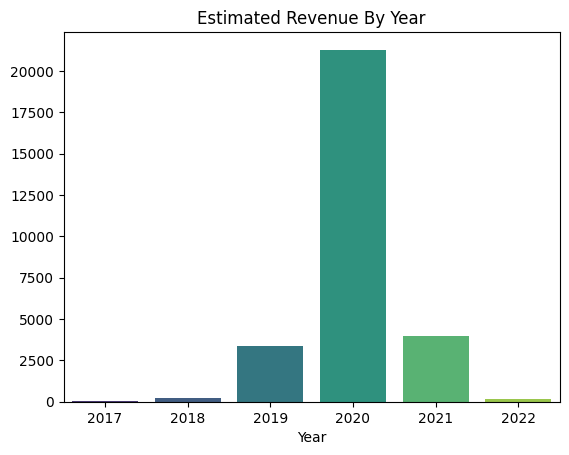

In [20]:
revenue=video.groupby(['Year'])['Your estimated revenue (USD)'].sum()
sns.barplot(x=revenue.index, y=revenue.values, palette="viridis")
plt.title('Estimated Revenue By Year')

In [ ]:
video.sort_values(by=["Comments added"],ascending=False)[['Video title',"Comments added"]][:10]

,Video title,Comments added
3,Uber Driver to Machine Learning Engineer in 9 ...,402
4,Why I'm Starting Data Science Over Again.,375
5,Interview with the Director of AI Research @ N...,329
6,"Ken Jee Q & A Live Stream (50,000 Sub Special!)",317
7,The Best Free Data Science Courses Nobody is T...,294
8,The State of Data Science with Krish Naik & Th...,267
9,"Data Science Productivity, Motivation, and Org...",246
10,Data Science Project from Scratch - Part 2 (Da...,241
11,Data Science Certificate vs Bootcamp vs Master...,239
12,How I Would Learn Data Science in 2021 (What H...,232


<ipython-input-23-ddac0f9efde5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Comments added", y="Video title",data=comment, palette="deep")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'How I Would Learn Data Science (If I Had to Start Over)'),
  Text(0, 1, '100K Channel Update + AMA Stream!'),
  Text(0, 2, 'Uber Driver to Machine Learning Engineer in 9 Months! (@Daniel Bourke) - KNN EP. 05'),
  Text(0, 3, "Why I'm Starting Data Science Over Again."),
  Text(0, 4, 'Interview with the Director of AI Research @ NVIDIA (Anima Anandkumar) - KNN EP. 07'),
  Text(0, 5, 'Ken Jee Q & A Live Stream (50,000 Sub Special!)'),
  Text(0, 6, 'The Best Free Data Science Courses Nobody is Talking About'),
  Text(0, 7, 'The State of Data Science with Krish Naik & The Data Professor [Panel Discussion]'),
  Text(0, 8, 'Data Science Productivity, Motivation, and Organization (ft. Data Professor & Codebasics)'),
  Text(0, 9, 'Data Science Project from Scratch - Part 2 (Data Collection)')])

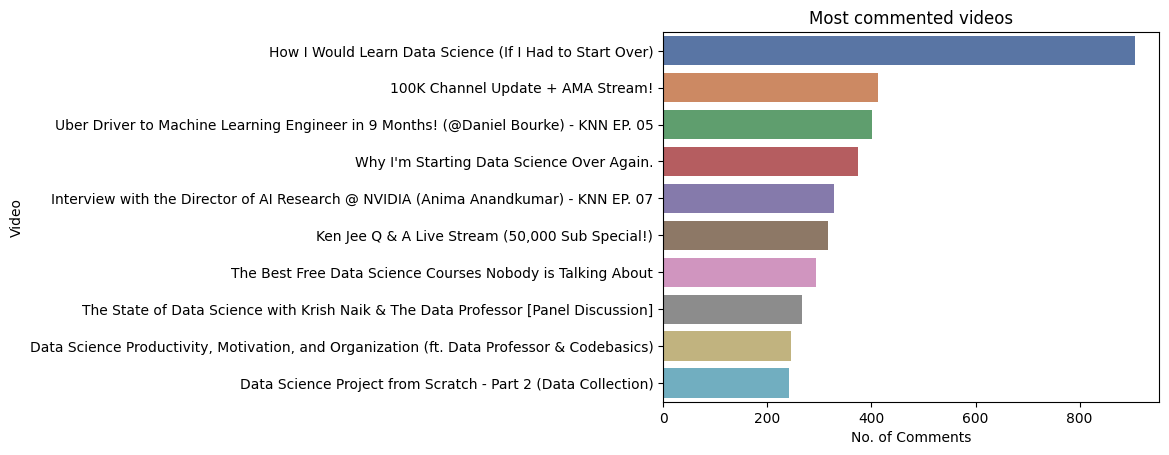

In [23]:
comment=video.sort_values(by=["Comments added"],ascending=False)[['Video title',"Comments added"]][:10]
sns.barplot(x="Comments added", y="Video title",data=comment, palette="deep")
plt.xlabel('No. of Comments')
plt.ylabel('Video')
plt.title('Most commented videos')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [ ]:
video.sort_values(by=["Shares"],ascending=False)[['Video title',"Shares"]][:10]

,Video title,Shares
7,The Best Free Data Science Courses Nobody is T...,4694
13,3 Proven Data Science Projects for Beginners (...,1935
17,Beginner Kaggle Data Science Project Walk-Thro...,1265
29,The Projects You Should Do To Get A Data Scien...,868
32,How I Would Learn Data Science in 2022 (If I H...,767
41,Data Science Project from Scratch - Part 1 (Pr...,744
12,How I Would Learn Data Science in 2021 (What H...,741
38,How to Make A Data Science Portfolio Website w...,584
8,The State of Data Science with Krish Naik & Th...,544
37,What is the #66DaysOfData?,541


<ipython-input-24-2dc9ddef32f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Shares", y="Video title", data=share, palette="viridis")


Text(0.5, 1.0, 'Most Shared videos')

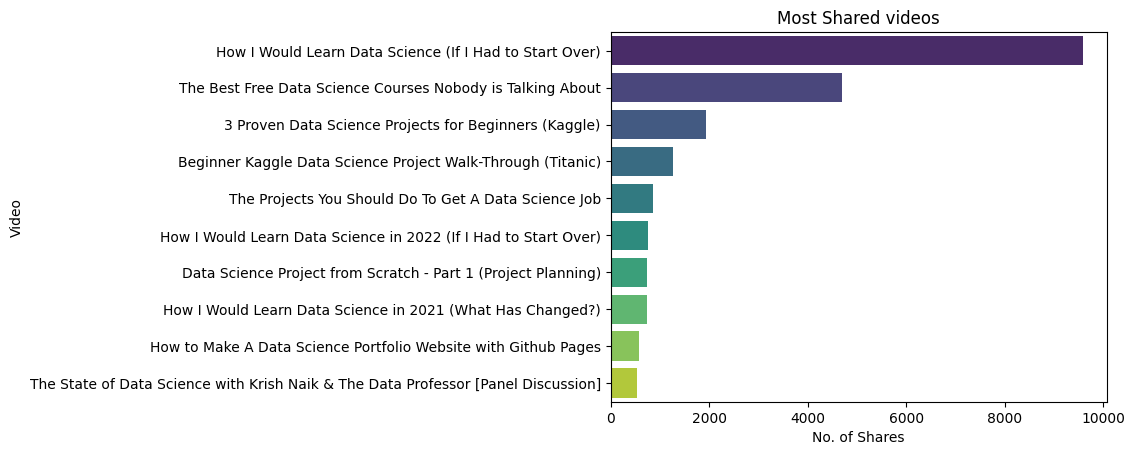

In [24]:
share=video.sort_values(by=["Shares"],ascending=False)[['Video title',"Shares"]][:10]
sns.barplot(x="Shares", y="Video title", data=share, palette="viridis")
plt.xlabel('No. of Shares')
plt.ylabel('Video')
plt.title('Most Shared videos')

In [ ]:
video.sort_values(by=["Likes"],ascending=False)[['Video title',"Likes"]][:10]

,Video title,Likes
7,The Best Free Data Science Courses Nobody is T...,19464
13,3 Proven Data Science Projects for Beginners (...,14708
12,How I Would Learn Data Science in 2021 (What H...,5869
29,The Projects You Should Do To Get A Data Scien...,5218
32,How I Would Learn Data Science in 2022 (If I H...,4413
17,Beginner Kaggle Data Science Project Walk-Thro...,4321
43,How to ULTRALEARN Data Science,3530
15,Why You Probably Won't Become a Data Scientist,3225
41,Data Science Project from Scratch - Part 1 (Pr...,3197
34,3 Reasons You Should NOT Become a Data Scientist,2783


<ipython-input-25-cc141d8cb60d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Likes", y="Video title", data=like, palette="pastel")


Text(0.5, 1.0, 'Most Liked videos')

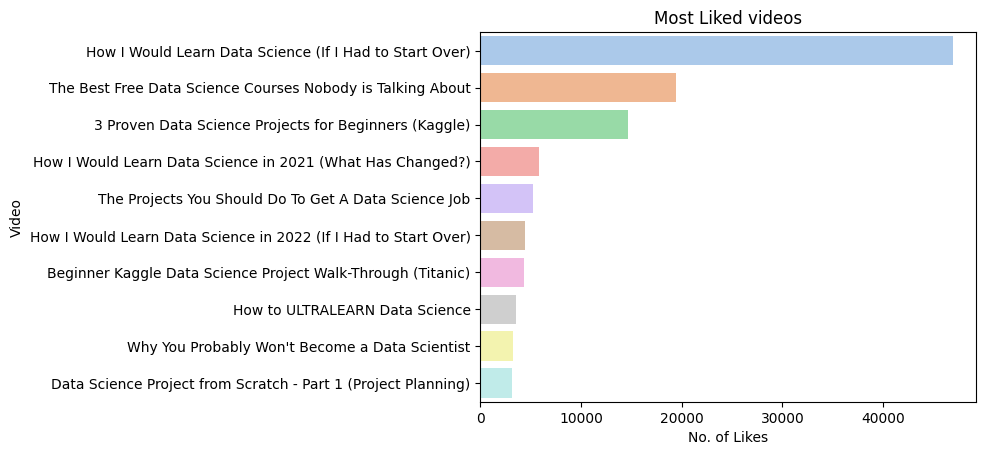

In [25]:
like=video.sort_values(by=["Likes"],ascending=False)[['Video title',"Likes"]][:10]
sns.barplot(x="Likes", y="Video title", data=like, palette="pastel")
plt.xlabel('No. of Likes')
plt.ylabel('Video')
plt.title('Most Liked videos')

In [ ]:
video.sort_values(by=["Dis­likes"],ascending=False)[['Video title',"Dis­likes"]][:10]

,Video title,Dis­likes
35,How I Learned Data Science,253
103,Reviewing Your Data Science Projects - Episode...,200
72,Is Data Science Right For You?,184
20,Why I Quit Data Science,159
15,Why You Probably Won't Become a Data Scientist,129
40,Different Data Science Roles Explained (by a D...,100
34,3 Reasons You Should NOT Become a Data Scientist,93
29,The Projects You Should Do To Get A Data Scien...,87
7,The Best Free Data Science Courses Nobody is T...,75
13,3 Proven Data Science Projects for Beginners (...,64


<ipython-input-27-5f1ca918c151>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Dis­likes", y="Video title", data=dislike, palette="muted")


Text(0.5, 1.0, 'Most Dis\xadliked videos')

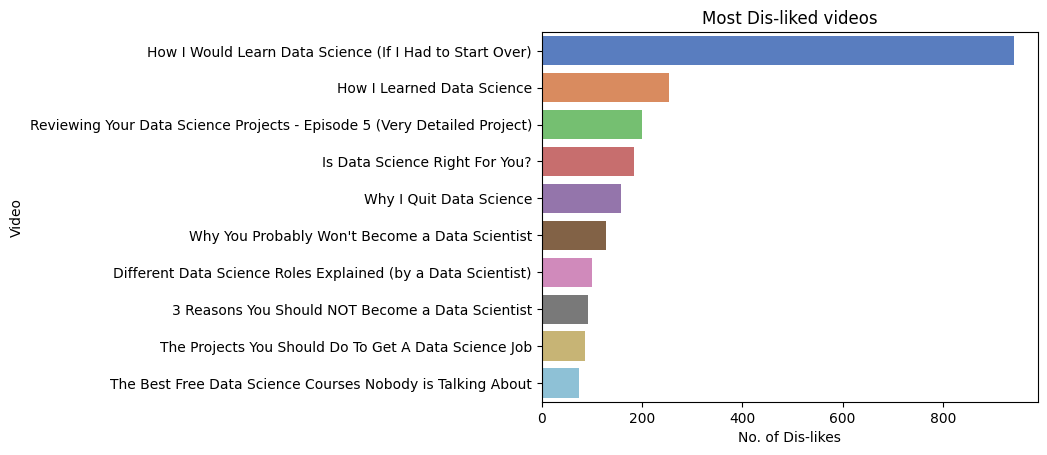

In [27]:
dislike=video.sort_values(by=["Dis­likes"],ascending=False)[['Video title',"Dis­likes"]][:10]
sns.barplot(x="Dis­likes", y="Video title", data=dislike, palette="muted")
plt.xlabel('No. of Dis­likes')
plt.ylabel('Video')
plt.title('Most Dis­liked videos')

In [ ]:
video.sort_values(by=["Views"],ascending=False)[['Video title',"Views"]][:10]

,Video title,Views
7,The Best Free Data Science Courses Nobody is T...,297222
13,3 Proven Data Science Projects for Beginners (...,237467
17,Beginner Kaggle Data Science Project Walk-Thro...,168183
29,The Projects You Should Do To Get A Data Scien...,131630
12,How I Would Learn Data Science in 2021 (What H...,123515
15,Why You Probably Won't Become a Data Scientist,108133
41,Data Science Project from Scratch - Part 1 (Pr...,102854
20,Why I Quit Data Science,98777
34,3 Reasons You Should NOT Become a Data Scientist,93329
11,Data Science Certificate vs Bootcamp vs Master...,92355


<ipython-input-28-38d429f9e0d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Views", y="Video title", data=view, palette="viridis", orient='h')


Text(0.5, 1.0, 'Most Viewed videos')

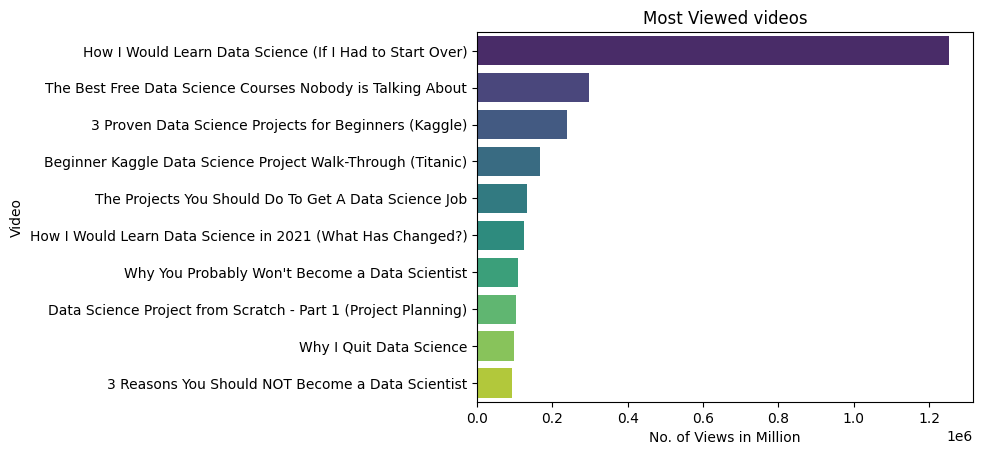

In [28]:
view=video.sort_values(by=["Views"],ascending=False)[['Video title',"Views"]][:10]
sns.barplot(x="Views", y="Video title", data=view, palette="viridis", orient='h')
plt.xlabel('No. of Views in Million')
plt.ylabel('Video')
plt.title('Most Viewed videos')